Imports:

In [8]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [9]:
%run ./Dados.ipynb
%run ./Funcoes.ipynb

Funções:

In [10]:
# Função que faz o processamento dos dados para a criação dos gráficos de cotas.
def ProcessamentoCotas(df):
    copia_df = df.copy()
    try:
        copia_df = ParteDataFrame(copia_df, ["TIPO_COTA", "SEXO"])
        copia_df["COTA"] = GruposDicio(copia_df["TIPO_COTA"], cotas)
        copia_df = RemoveColunas(copia_df, "TIPO_COTA")
        copia_df = pd.concat([ColLoc(copia_df, "SEXO", "F"), ColLoc(copia_df, "SEXO", "M")])
        copia_df = pd.concat([ColLoc(copia_df, "COTA", "RACIAL"), ColLoc(copia_df, "COTA", "AMPLA CONCORRENCIA"), ColLoc(copia_df, "COTA", "BAIXA RENDA"), ColLoc(copia_df, "COTA", "DEFICIENTE"), ColLoc(copia_df, "COTA", "PUBLICA")])
        return copia_df
    except:
        print("Erro")
        return df

In [11]:
# Função que constrói os gráficos de cotas.
def CotasPlot(df, palette, ax, titulo="", titulo_tamanho=15, despine=False, x="SEXO", hue="SEXO", quant_max = 1600, dist= 100):
    # Gráfico
    grafico = sns.histplot(data=df, x=x, hue=hue, palette=CoresPalette(df[hue], palette), ax=ax)

    # Aparência
    grafico.set(xlabel="Sexo", ylabel="Quantidade")
    grafico.set_title(titulo, fontsize=titulo_tamanho, y=1.05)
    ax.legend(title='Sexo', loc='upper right', labels=['Masculino', 'Feminino'])
    LabelNumeros(coluna=df[x].value_counts(), ax=ax, label="y", fim=quant_max, distancia=dist)
    
    return grafico

Processamento dos dados:

In [12]:
# 2021
df_cotas21 = ProcessamentoCotas(df21)

# 2022
df_cotas22 = ProcessamentoCotas(df22)

# Gráficos de Cotas:

# 2021

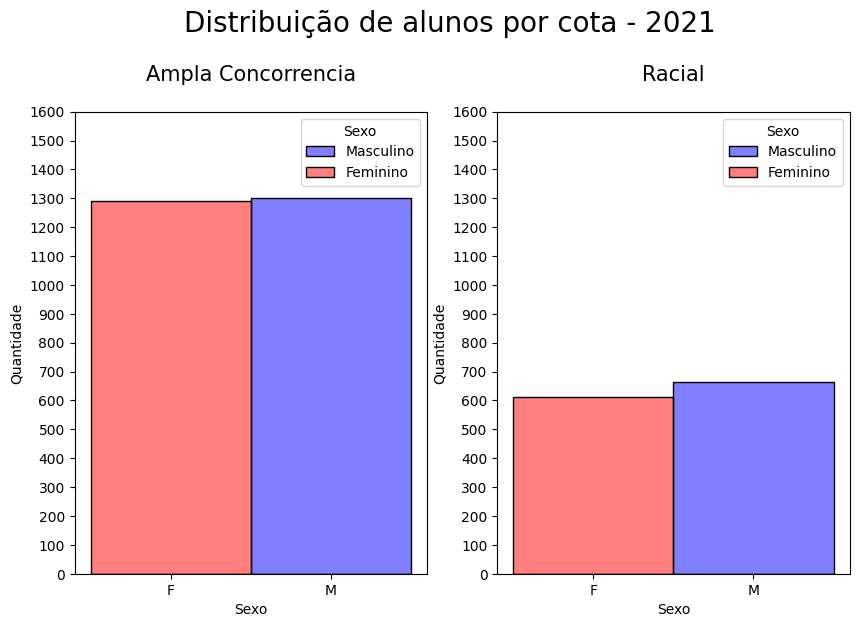

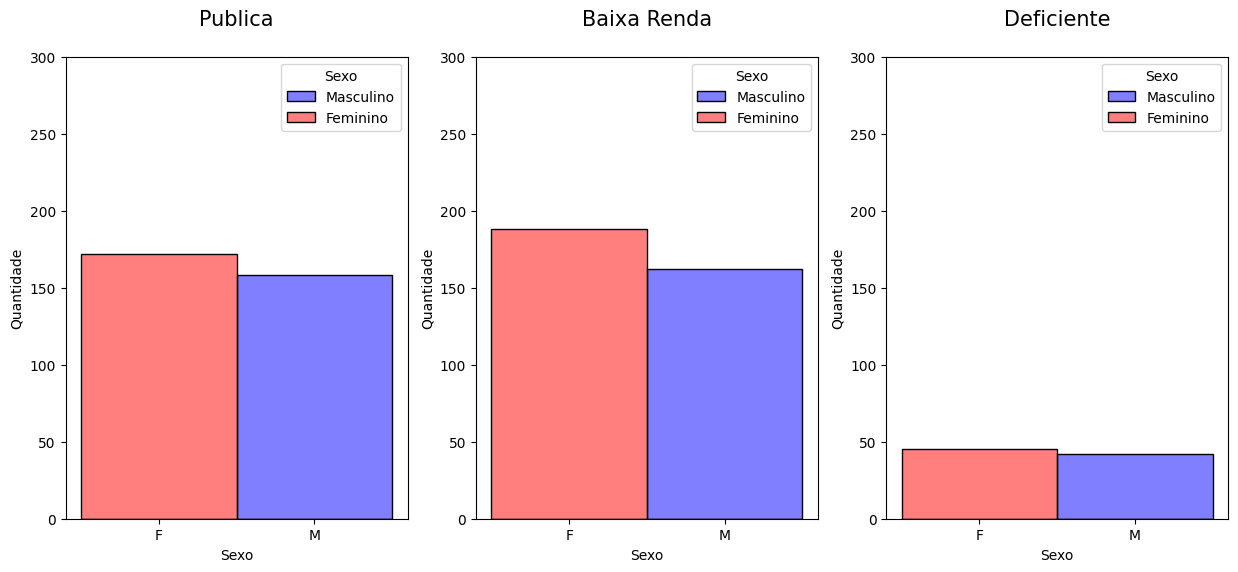

In [13]:
# Cria as figuras e os gráficos da quantidade de alunos que entraram no ano de 2021 divididos pelo tipo de coda.

# Figura
cotas21_1, pos1 = plt.subplots(nrows = 1, ncols=2, figsize=(10, 6))
cotas21_1.suptitle("Distribuição de alunos por cota - 2021", fontsize=20, y=1.05)
cotas21_2, pos2 = plt.subplots(nrows = 1, ncols=3, figsize=(15, 6))

# Gráfico
CotasPlot(ColLoc(df_cotas21, "COTA", "AMPLA CONCORRENCIA"), sexo_palette, pos1[0], titulo="Ampla Concorrencia")
CotasPlot(ColLoc(df_cotas21, "COTA", "RACIAL"), sexo_palette, pos1[1], titulo="Racial")
CotasPlot(ColLoc(df_cotas21, "COTA", "PUBLICA"), sexo_palette, pos2[0], titulo="Publica", quant_max=300, dist=50)
CotasPlot(ColLoc(df_cotas21, "COTA", "BAIXA RENDA"), sexo_palette, pos2[1], titulo="Baixa Renda", quant_max=300, dist=50)
CotasPlot(ColLoc(df_cotas21, "COTA", "DEFICIENTE"), sexo_palette, pos2[2], titulo="Deficiente", quant_max=300, dist=50)

plt.show(cotas21_1)
plt.show(cotas21_2)

# 2022

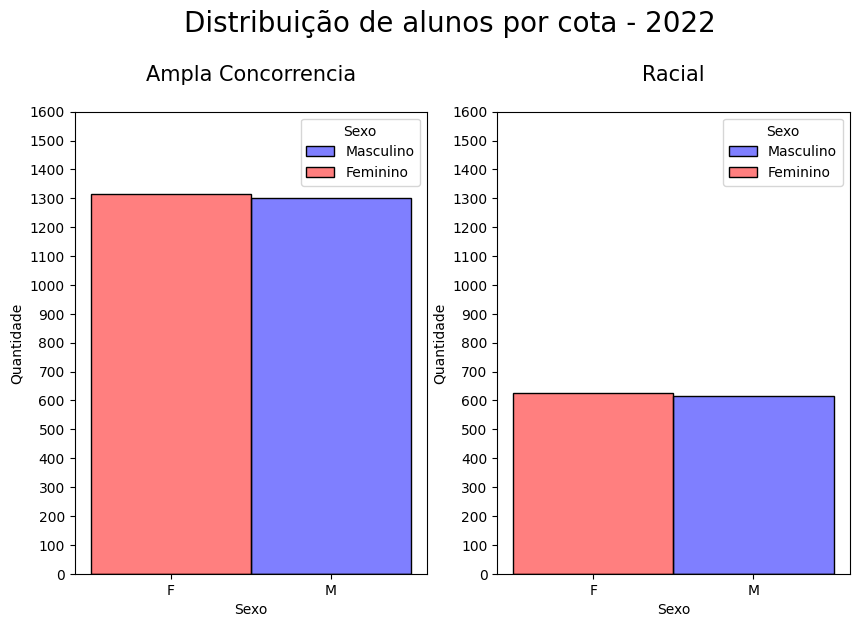

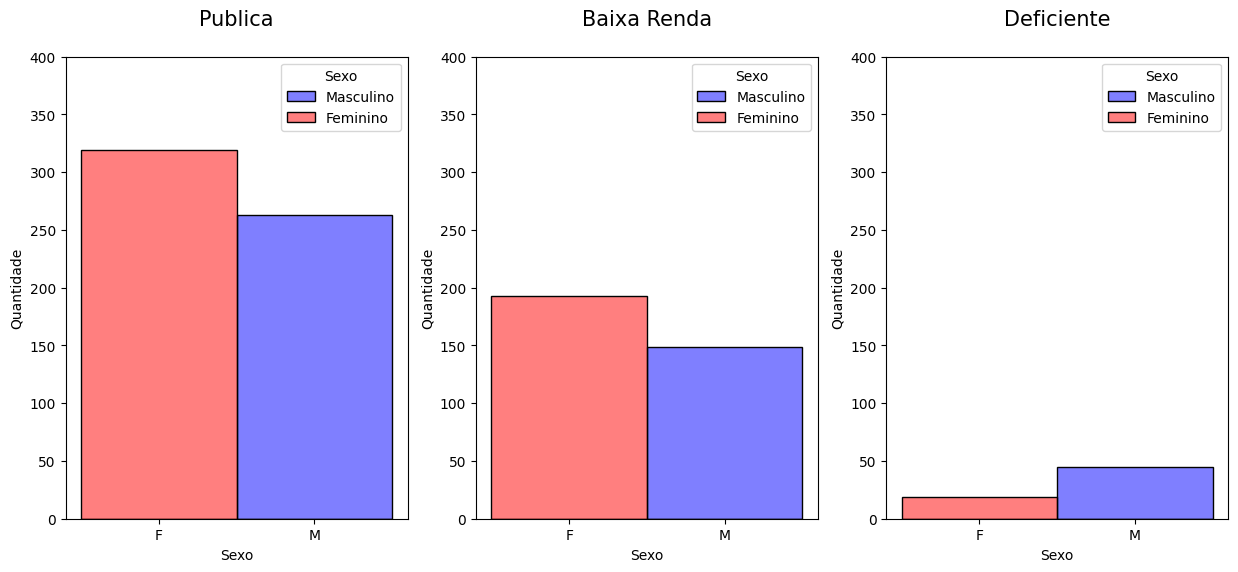

In [14]:
# Cria as figuras e os gráficos da quantidade de alunos que entraram no ano de 2022 divididos pelo tipo de coda.

# Figura
cotas22_1, pos3 = plt.subplots(nrows = 1, ncols=2, figsize=(10, 6))
cotas22_1.suptitle("Distribuição de alunos por cota - 2022", fontsize=20, y=1.05)
cotas22_2, pos4 = plt.subplots(nrows = 1, ncols=3, figsize=(15, 6))

# Gráfico
CotasPlot(ColLoc(df_cotas22, "COTA", "AMPLA CONCORRENCIA"), sexo_palette, pos3[0], titulo="Ampla Concorrencia")
CotasPlot(ColLoc(df_cotas22, "COTA", "RACIAL"), sexo_palette, pos3[1], titulo="Racial")
CotasPlot(ColLoc(df_cotas22, "COTA", "PUBLICA"), sexo_palette, pos4[0], titulo="Publica", quant_max=400, dist=50)
CotasPlot(ColLoc(df_cotas22, "COTA", "BAIXA RENDA"), sexo_palette, pos4[1], titulo="Baixa Renda", quant_max=400, dist=50)
CotasPlot(ColLoc(df_cotas22, "COTA", "DEFICIENTE"), sexo_palette, pos4[2], titulo="Deficiente", quant_max=400, dist=50)

plt.show(cotas21_1)
plt.show(cotas21_2)